# Countries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('p24-projet-pe-groupe-8/countries.csv', index_col='country')
df.head()

,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,continent
country,,,,,,,,,,
Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,Asia
Albania,Shqipëria,AL,ALB,2895947.0,28748.0,Tirana,41.326873,19.818791,Southern Europe,Europe
Algeria,الجزائر,DZ,DZA,38700000.0,2381741.0,Algiers,36.775361,3.060188,Northern Africa,Africa
American Samoa,American Samoa,AS,ASM,55519.0,199.0,Pago Pago,-14.275479,-170.704830,Polynesia,Oceania
Angola,Angola,AO,AGO,24383301.0,1246700.0,Luanda,-8.827270,13.243951,Central Africa,Africa


## Données générales sur la table

In [4]:
print(df.ndim)
print(df.shape)
print(df.columns)

2
(214, 10)
Index(['native_name', 'iso2', 'iso3', 'population', 'area', 'capital',
       'capital_lat', 'capital_lng', 'region', 'continent'],
      dtype='object')


On étudie 214 pays selon 10 caractéristiques : nom, code iso2 et iso3, population, surface, capitale et sa position, région et continent.

In [5]:
df.describe()

,population,area,capital_lat,capital_lng
count,2.100000e+02,2.070000e+02,212.000000,212.000000
mean,3.365144e+07,6.537604e+05,18.812330,16.545432
std,1.330461e+08,1.866909e+06,26.590545,69.625088
min,3.000000e+01,2.020000e+00,-54.283545,-176.174022
25%,7.572605e+05,1.306600e+04,2.874467,-13.375923
50%,6.315500e+06,1.098840e+05,18.025227,16.725786
75%,2.268378e+07,4.817710e+05,41.315970,47.637577
max,1.367110e+09,1.712444e+07,78.223156,179.118650


In [6]:
print(f'On étudie {len(df['region'].unique())} régions différents : {df['region'].unique()}')

On étudie 25 régions différents : ['Southern and Central Asia' 'Southern Europe' 'Northern Africa'
 'Polynesia' 'Central Africa' 'Caribbean' 'South America' 'Middle East'
 'Australia and New Zealand' 'Western Europe' 'Eastern Europe'
 'Central America' 'Western Africa' 'North America' 'Southern Africa'
 'Southeast Asia' 'Eastern Africa' 'Eastern Asia' nan 'Nordic Countries'
 'Baltic Countries' 'Melanesia' 'Antarctica' 'Micronesia' 'British Isles']


In [7]:
print(f'et on étudie {len(df['continent'].unique())} continents différents : {df['continent'].unique()}')

et on étudie 8 continents différents : ['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America' nan
 'Antarctica']


In [8]:
df['continent'].value_counts() #plus précisemment le nombre de ville par pays

continent
Africa           53
Asia             48
Europe           44
North America    27
Oceania          18
South America    14
Antarctica        2
Name: count, dtype: int64

In [9]:
df['region'].value_counts()

region
Eastern Africa               19
Middle East                  17
Western Africa               16
Caribbean                    15
South America                14
Southern and Central Asia    13
Southern Europe              11
Southeast Asia               11
Eastern Europe               10
Western Europe                9
Central Africa                8
Northern Africa               7
Eastern Asia                  7
Central America               7
Polynesia                     6
Nordic Countries              6
North America                 5
Southern Africa               5
Australia and New Zealand     4
Melanesia                     4
Micronesia                    4
Baltic Countries              3
Antarctica                    2
British Isles                 2
Name: count, dtype: int64

In [10]:
df['native_name'].dtype

dtype('O')

In [11]:
df['capital_lng'].dtype

dtype('float64')

## Analyse de la table

In [12]:
print(f'La population mondiale est de {df['population'].sum()} personnes')

La population mondiale est de 7066801972.0 personnes


In [13]:
df_c = df.groupby(by='continent').sum()
df_c[['population', 'area']]

,population,area
continent,,
Africa,9.614516e+08,26331601.00
Antarctica,1.700000e+02,7747.00
Asia,4.227465e+09,31361451.00
Europe,7.374223e+08,23764451.02
North America,5.910349e+08,24865501.00
Oceania,1.458278e+07,8494476.00
South America,4.107765e+08,17749848.00


In [14]:
df_r = df.groupby(by='region').sum()
df_r[['population', 'area']]

,population,area
region,,
Antarctica,1.700000e+02,7747.00
Australia and New Zealand,4.552274e+06,7962662.00
Baltic Countries,6.234929e+06,175086.00
British Isles,7.048365e+07,313173.00
Caribbean,4.080535e+07,227674.00
Central Africa,6.886646e+07,4267809.00
Central America,1.618434e+08,2411236.00
Eastern Africa,3.495779e+08,6860916.00
Eastern Asia,1.580494e+09,11803933.00


### Comparaison de la densité

En fonction de pays, de la région, du continent 

In [15]:
df['densité'] = df['population']/(df['area']*(10**6)) # nombre de personnes par m²
df_c['densité'] = df_c['population']/(df_c['area']*(10**6))
df_r['densité'] = df_r['population']/(df_r['area']*(10**6))

In [16]:
df['densité']

country
Afghanistan          0.000040
Albania              0.000101
Algeria              0.000016
American Samoa       0.000279
Angola               0.000020
                       ...   
Wallis and Futuna    0.000092
Western Sahara       0.000002
Yemen                0.000049
Zambia               0.000020
Zimbabwe             0.000033
Name: densité, Length: 214, dtype: float64

In [17]:
df_c['densité']

continent
Africa           3.651322e-05
Antarctica       2.194398e-08
Asia             1.347981e-04
Europe           3.103048e-05
North America    2.376927e-05
Oceania          1.716737e-06
South America    2.314254e-05
Name: densité, dtype: float64

In [18]:
df_r['densité']

region
Antarctica                   2.194398e-08
Australia and New Zealand    5.717025e-07
Baltic Countries             3.561067e-05
British Isles                2.250630e-04
Caribbean                    1.792271e-04
Central Africa               1.613626e-05
Central America              6.712051e-05
Eastern Africa               5.095208e-05
Eastern Asia                 1.338956e-04
Eastern Europe               1.558100e-05
Melanesia                    1.743341e-05
Micronesia                   1.874254e-04
Middle East                  5.176431e-05
Nordic Countries             2.093642e-05
North America                1.629585e-05
Northern Africa              2.718763e-05
Polynesia                    7.239109e-05
South America                2.314254e-05
Southeast Asia               1.494997e-04
Southern Africa              2.292065e-05
Southern Europe              1.097584e-04
Southern and Central Asia    1.675057e-04
Western Africa               5.416202e-05
Western Europe             

<BarContainer object of 7 artists>

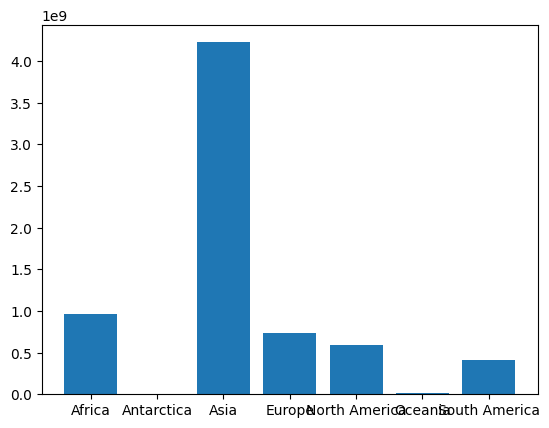

In [19]:
plt.bar(df_c.index, df_c['population'])

<BarContainer object of 7 artists>

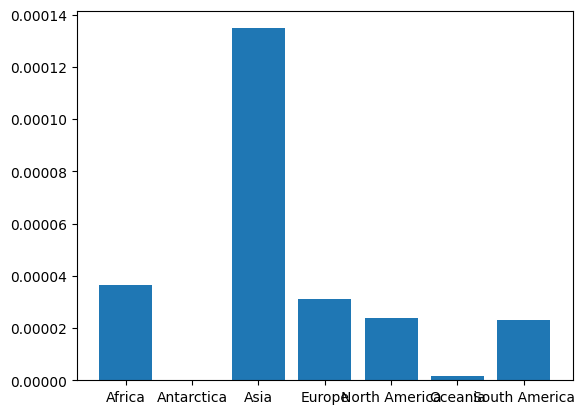

In [20]:
plt.bar(df_c.index, df_c['densité'])

COMMENTAIRES: On remarque que l'Asie est de loin le continent le plus peuplé et le plus dense en population. Cela est dû au fait que malgré des régions très désertiques comme la Mongolie ou l'est de la Russie, la Chine et l'Inde sont des pays extrêmement peuplés

Population en fonction de la surface 

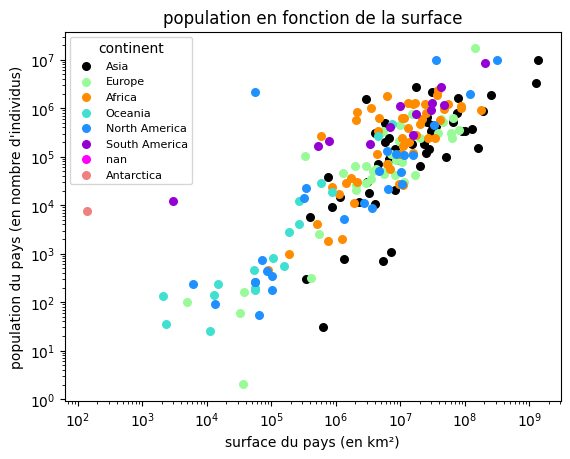

In [21]:
continent = df['continent'].unique()
couleurs = ['black', 'palegreen', 'darkorange', 'turquoise', 'dodgerblue', 'darkviolet', 'fuchsia', 'lightcoral']
for i in range(len(continent)) :
    mask = (df['continent'] == continent[i])
    df_c = df[mask]
    plt.scatter(y=df_c['area'], x=df_c['population'], marker='o', s = 30,  label = continent[i], color = couleurs[i])
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize = 8, title = 'continent')
plt.xlabel('surface du pays (en km²)')
plt.ylabel('population du pays (en nombre d\'individus)')
plt.title('population en fonction de la surface')
plt.show()

COMMENTAIRES: On observe une relation de type pop = k*surface**p ou p semble proche de 1, on a une relation presque linéaire entre ces 2 données. Plus le pays est grand et plus il est peuplé, cela paraît cohérent. On remarque que les continents africains at asiatiques semblent concentrés les pays possédant une grande surface et population importante

Comparaison hémisphère nord et sud, population en fonction de la latitude ? 

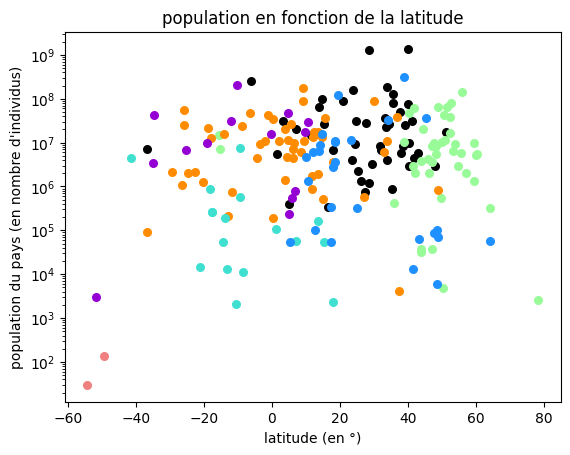

In [22]:
continent = df['continent'].unique()
couleurs = ['black', 'palegreen', 'darkorange', 'turquoise', 'dodgerblue', 'darkviolet', 'fuchsia', 'lightcoral']
for i in range(len(continent)) :
    mask = (df['continent'] == continent[i])
    df_c = df[mask]
    plt.scatter(y=df_c['population'], x=df_c['capital_lat'], marker='o', s = 30,  label = continent[i], color = couleurs[i])
#plt.legend(fontsize = 8, title = 'continent')
plt.yscale('log')
plt.xlabel('latitude (en °)')
plt.ylabel('population du pays (en nombre d\'individus)')
plt.title('population en fonction de la latitude')
plt.show()

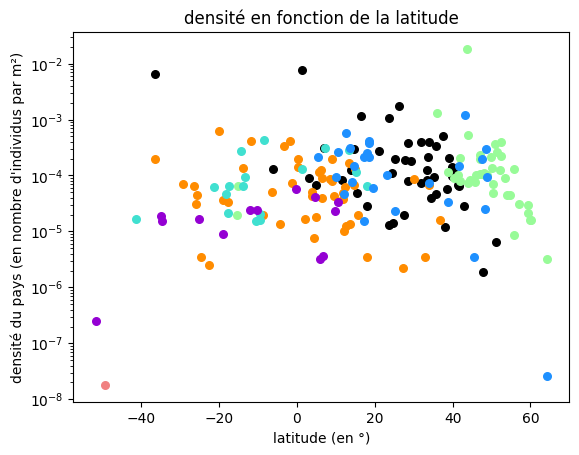

In [26]:
continent = df['continent'].unique()
couleurs = ['black', 'palegreen', 'darkorange', 'turquoise', 'dodgerblue', 'darkviolet', 'fuchsia', 'lightcoral']
for i in range(len(continent)) :
    mask = (df['continent'] == continent[i])
    df_c = df[mask]
    plt.scatter(y=df_c['densité'], x=df_c['capital_lat'], marker='o', s = 30,  label = continent[i], color = couleurs[i])
#plt.legend(fontsize = 8, title = 'continent')
plt.yscale('log')
plt.xlabel('latitude (en °)')
plt.ylabel('densité du pays (en nombre d\'individus par m²)')
plt.title('densité en fonction de la latitude')
plt.show()

COMMENTAIRES: On observe pas de différence de population ou de densité entre le nord(latitude positive) et le sud (latitude négative)

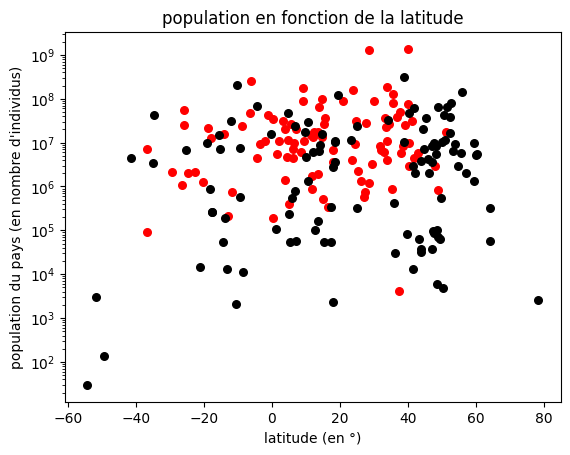

In [24]:
mask = (df['continent'] == 'Asia') | (df['continent'] =='Africa')
df1 = df[mask]
df2 = df[~mask]
plt.scatter(y=df1['population'], x=df1['capital_lat'], marker='o', s = 30,  label = 'emergents', color = 'red')
plt.scatter(y=df2['population'], x=df2['capital_lat'], marker='o', s = 30, color = 'black')
#plt.legend(fontsize = 8, title = 'continent')
plt.yscale('log')
plt.xlabel('latitude (en °)')
plt.ylabel('population du pays (en nombre d\'individus)')
plt.title('population en fonction de la latitude')
plt.show()

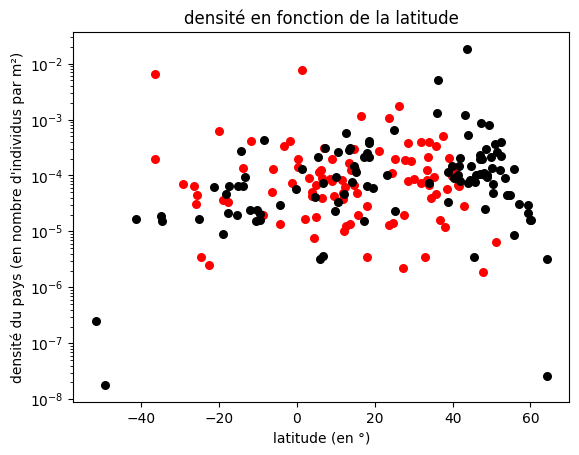

In [28]:
mask = (df['continent'] == 'Asia') | (df['continent'] =='Africa')
df1 = df[mask]
df2 = df[~mask]
plt.scatter(y=df1['densité'], x=df1['capital_lat'], marker='o', s = 30,  label = 'emergents', color = 'red')
plt.scatter(y=df2['densité'], x=df2['capital_lat'], marker='o', s = 30, color = 'black')
#plt.legend(fontsize = 8, title = 'continent')
plt.yscale('log')
plt.xlabel('latitude (en °)')
plt.ylabel('densité du pays (en nombre d\'individus par m²)')
plt.title('densité en fonction de la latitude')
plt.show()

COMMENTAIRES: On n'observe pas de différence non plus, il faudrait s'intéresser à des données temporelles pour avoir des résultats pertinents (la population des pays émergents ayant augmentée plus tardivement et plus rapidement)